# Projeto de IA em Saúde

**Atividade somativa 2**
**PUCPR**

Yuri Matheus D. Psybiowski da S.

## Descrição do cenário

### Qual é o objetivo do projeto?

O objetivo é predizer de forma eficiente se um paciente apresentará câncer de pulmão ou não a partir de algumas condições.

### Qual é o contexto da organização para o qual o projeto está sendo desenvolvido? (pode ser fictício)

É uma organização de pesquisa em saúde no desenvolvimento de modelos que auxiliem diagnósticos dos mais variados problemas. É uma organização de parceria pública e privada.

### Qual é a motivação para a construção do projeto neste cenário? Quais problemas ele busca resolver?

A motivação é buscar entender mais como esses modelos trabalham e quais as dificuldades dos processos de implementação deles no ãmbito da saúde, além de suas implicações éticas e morais. O projeto busca resolver uma questão de sobrecarga no sistema de saúde, a partir do uso como auxílio aos especialistas dos modelos de predição de câncer. Por ser um sistema automatizado e mais rápiso, pode avaliar milhares de exames em pouco tempo, aliviando os profissionais para que foquem nos pacientes potenciais.

## Descrição das tecnologias adotadas

### Qual abordagem de desenvolvimento será escolhida?

A abordagem de desenvolvimento é em cascata.

### Quais técnicas de PLN e ML serão utilizadas?

Foram utilizadas as técnicas de regressão, RandomForestRegressor, as técnicas de classificação, LogisticRegression, DecisionTreeClassifier e GaussinaNB.

### Quais bibliotecas/pacotes/frameworks serão utilizados?

Foram utilizados várias bibliotecas e pacotes, segue abaixo detalhes:

- Pandas
- Numpy
- matplotlib
- Seaborn
- ydata_profiling
- collection
- sklearn

### Justificar o uso de todas as tecnologias adotadas.

As bibliotecas Pandas, Numpy, matplotlib, seaborn e ydata_profilling, foram utilizadas para manipulação de dados no dataframe, plotagem de gráficos e análises exploratórias dos dados. O collection foi utilizado para agrupar valores e o sklearn para manipular e treinar os modelos de machine learning.

## Descrição do dataset escolhido

### Quais dados constam no dataset?

O dataset é composto por 16 features, são elas:

- GENDER
- AGE
- SMOKING
- YELLOW_FINGERS
- ANXIETY
- PEER_PRESSURE
- CHRONIC_DISEASE
- FATIGUE
- ALLERGY
- WHEEZING
- ALCOHOL_CONSUMING
- COUGHING
- SHORTNESS_OF_BREATH
- SWALLOWING_DIFFICULTY
- CHEST_PAIN
- LUNG_CANCER

### Quais dados serão utilizados no desenvolvimento do projeto?

Todos os dados participaram dos treinamentos dos modelos

### Qual a origem dos dados?

Os dados são originários da plataforma KAGGLE
https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

### Em quais tarefas o dataset poderia ser útil?

As tarefas que o dataset podem ser úteis são, aprendizado, testes de novos modelos, análise de diferentes hiperparâmetros e processos e simulações no âmbito da saúde.

# Imports

In [2]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2d5bc6ffd1eaea5264f27e37673eeb61e8f0fd7ec044f1190c6ef04a1925c89c
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [1]:
# Imports de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport # Biblioteca para análise exploratória de dados
from collections import Counter
from sklearn.model_selection import train_test_split # Usado para dividir o df para treinamento
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Carregando o dataset

In [2]:
# Carregando o dataset em um df
df_cancer = pd.read_csv("dslungcancer.csv")

# Informações gerais do df

In [3]:
# Exibindo as 5 primeiras linhas do df
df_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [4]:
# Exibindo as informações gerais do df
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

**Observação:** São 3000 instâncias com 16 colunas, das quais 2 são do tipo objeto e as outras do tipo int. Não há dados nulos.

In [5]:
# Características descritivas do df
df_cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Manipulação e limpeza do df

In [6]:
# Alterando os valores da variável independente. Os valores YES recebem 1 e NO recebem 0.
df_cancer.loc[:, 'LUNG_CANCER'] = df_cancer['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})

/tmp/ipython-input-2170575847.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cancer.loc[:, 'LUNG_CANCER'] = df_cancer['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})


In [7]:
# Alterando o tipo de dado da coluna LUNG_CANCER
df_cancer['LUNG_CANCER'] = df_cancer['LUNG_CANCER'].astype('int64')

In [8]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [9]:
# Análise exploratória de dados
profile_df_cancer = ProfileReport(df_cancer)
profile_df_cancer.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 52.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Observação:** Percebe-se que o relatório acima mostra que não há instâncias vazias, mas que há duas instâncias duplicadas, então resolveremos isso.

## Removendo duplicatas

In [10]:
# Retirando dados duplicados
df_cancer = df_cancer.drop_duplicates()
df_cancer.shape

(2998, 16)

## Análise exlporatória de dados

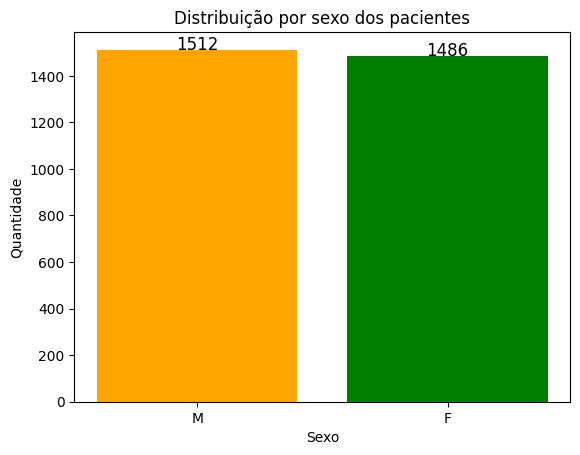

In [11]:
# Contagem dos sexos masculino e feminino
sexo = df_cancer["GENDER"].value_counts()

# Criação de um gráfico de barras para ambos os sexos
plt.bar(sexo.index, sexo.values, color=["orange", "green"])
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Distribuição por sexo dos pacientes')

# Criando visualização dos números totais de ambos os sexos
for i, valor in enumerate(sexo.values):
    plt.text(i, valor + 0.1, str(valor), ha='center', fontsize=12)

plt.show()

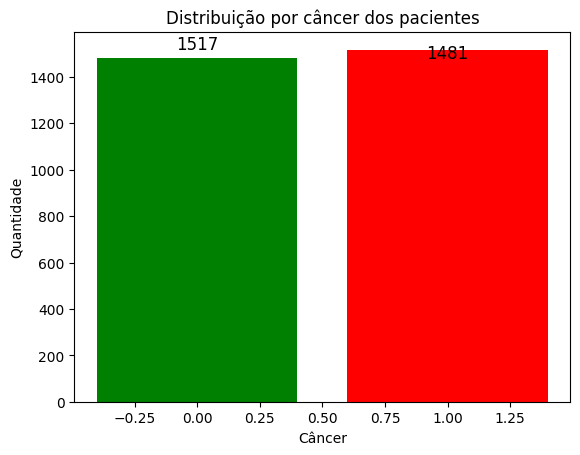

In [12]:
# Contagem dos casos positivos e negativos de câncer
cancer = df_cancer["LUNG_CANCER"].value_counts()

# Criação de um gráfico de barras para ambos os casos
plt.bar(cancer.index, cancer.values, color=["red", "green"])
plt.xlabel('Câncer')
plt.ylabel('Quantidade')
plt.title('Distribuição por câncer dos pacientes')

# Criando visualização dos números totais de ambos os casos
for i, valor in enumerate(cancer.values):
    plt.text(i, valor + 0.1, str(valor), ha='center', fontsize=12)

plt.show()

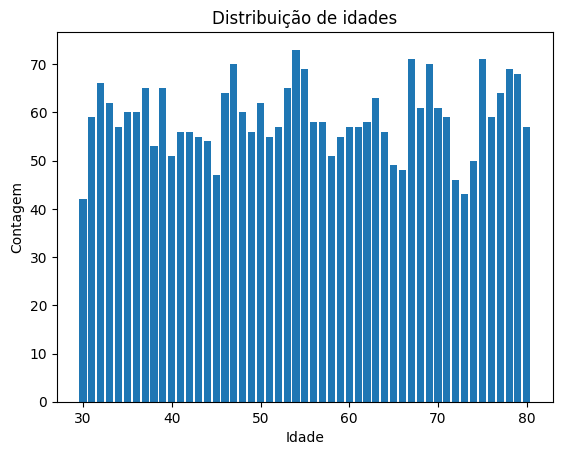

In [13]:
# Contar a quantidade de cada valor na coluna 'AGE'
idade = Counter(df_cancer['AGE'])

# Criar o gráfico com matplotlib
plt.bar(idade.keys(), idade.values())
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de idades')
plt.show()

# Técnicas de Machine Learning

## Divisão do dataset para treinamento

In [14]:
# Separação das variáveis dependentes e independentes
X = df_cancer.drop(['GENDER', 'LUNG_CANCER'], axis=1) # Variáveis independentes
Y = df_cancer['LUNG_CANCER'] # Variável dependente

In [15]:
# Divisão do df
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [16]:
# Criação de um df vazio para receber os resultados dos modelos
df_resultado = pd.DataFrame(columns = ['Modelo', 'Score'])

## RandomForestRegressor

In [17]:
# Treinamento do dataset com o RandomForestRegressor
modelo = RandomForestRegressor() # Inicializa o modelo de Regressão
modelo.fit(X_train, y_train) # Treina o modelo com o conjunto de treino (X_train e y_train)

predicao = modelo.predict(X_test) # Faz a previsão para o conjunto de teste

In [18]:
# Inserção dos resultados no df_resultado
df_resultado.loc[len(df_resultado)] = ['RandomForestRegressor', mean_squared_error(y_test, predicao)] # Foi utilizado MSE para avaliar o score do modelo
df_resultado

,Modelo,Score
0,RandomForestRegressor,0.265066


## LogisticRegression

In [19]:
# Treinamento do dataset com o RandomForestRegressor
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)

predicao = modelo_lr.predict(X_test)

In [20]:
# Inserção dos resultados no df_resultado
df_resultado.loc[len(df_resultado)] = ['LogisticRegression', accuracy_score(y_test, predicao)]
df_resultado

,Modelo,Score
0,RandomForestRegressor,0.265066
1,LogisticRegression,0.514667


## DecisionTreeClassifier

In [21]:
# Treinamento do dataset com o DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predicao = clf.predict(X_test)

In [22]:
# Inserção dos resultados no df_resultado
df_resultado.loc[len(df_resultado)] = ['DecisionTreeClassifier', accuracy_score(y_test, predicao)]
df_resultado

,Modelo,Score
0,RandomForestRegressor,0.265066
1,LogisticRegression,0.514667
2,DecisionTreeClassifier,0.528000


## GaussianNB

In [23]:
# Treinamento do dataset com o DecisionTreeClassifier
nb = GaussianNB()
nb.fit(X_train, y_train)

predicao = nb.predict(X_test)

In [24]:
df_resultado.loc[len(df_resultado)] = ['GaussianNB', accuracy_score(y_test, predicao)]
df_resultado

,Modelo,Score
0,RandomForestRegressor,0.265066
1,LogisticRegression,0.514667
2,DecisionTreeClassifier,0.528000
3,GaussianNB,0.516000


## df_resultado e observações

In [25]:
df_resultado

,Modelo,Score
0,RandomForestRegressor,0.265066
1,LogisticRegression,0.514667
2,DecisionTreeClassifier,0.528000
3,GaussianNB,0.516000


**Observações**

Foram testados 4 modelos de ML, são eles, **RandomForestRegressor**, **LogisticRegression**, **DecisionTreeClassifier** e **GaussianNB**.
Os resultados (Scores) foram, respectivamente, 0.265708, 0.514667, 0.532000 e 0.532000 (que podem mudar ao executar o projeto novamente!!).
Em relação aos resultados, eles já foram avaliados de acordo com métricas de regressão e classificação.
O modelo que apresentou o melhor resultado foi o RandomForestRegressor. Os outros ficaram próximos uns dos outros, na faixa de 0.5, ou seja, não apresentaram bons resultados (Serão comentados na conclusão).

## Comparando o real com o predito

In [26]:
# df comparando o real com o predito
df_test = X_test.copy()
df_test['LUNG_CANCER_Real'] = y_test
df_test['LUNG_CANCER_Predicao'] = modelo.predict(X_test)
df_test.sample(20)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER_Real,LUNG_CANCER_Predicao
450,37,2,2,2,1,2,1,1,2,2,2,1,1,2,0,0.40
2667,42,2,1,1,2,2,2,1,1,1,2,1,1,2,0,0.53
2421,77,2,2,1,2,1,2,2,1,1,1,2,1,2,0,0.46
650,76,2,2,1,1,1,1,2,2,1,1,2,1,1,1,0.63
192,50,2,2,1,2,2,2,2,2,1,2,1,2,2,0,0.33
2274,35,1,2,1,2,2,2,2,2,1,1,1,1,1,1,0.34
637,54,1,1,2,2,2,2,2,2,1,1,1,1,1,0,0.44
1815,42,1,1,1,2,1,1,1,1,2,2,1,2,2,0,0.58
1526,55,2,2,2,2,2,1,1,2,1,2,1,2,1,0,0.55
1211,53,2,2,1,2,2,2,1,2,1,2,1,1,2,0,0.19


# Conclusão

O dataset foi retirado do Kaggle, é um dataset pequeno com apenas 3000 instâncias e 16 colunas. Seus dados são basicamente binários (sim ou não, sendo 1 'sim' e 0 'não'), com exceção das colunas idade, sexo e câncer de pulmão. É um dataset que não apresenta instâncias zeradas ou nulas, mas que teve somente duas delas duplicadas, então não precisou de um pré-processamento extenso. Por ser binária, sua análise exploratória também foi bem simples, foram plotados alguns gráficos de barras e um histograma da frequência das idades. Logo após isso, foi realizado a divisão e o treinamento dos modelos, cujo os resultados foram adicionados em um df específico e separado do original. Foram utilizados 4 modelos, um de regressão e os outros de classificação. O modelo de regressão apresentou melhor resultados em relação aos outros, mas ainda assim, não foi um resultado muito bom. Para avaliação dos modelos, foram utilizadas métricas específicas para cada grupo de ML, MSE para o modelo de regressão e Accuracy para os modelos de classificação. Como o projeto é predizer se um paciente poderia ter câncer ou não a depender de certas condições, o modelo precisa de muitas melhoras ainda, como testar diferentes hiperparâmetros, que não foi testado aqui, para verificar os melhores resultados. Além dos hiperparâmetros, é possível fazer uma seleção de features para verificar quais colunas são mais impactantes para o resultado. Por último, é possível utilizar outros parâmetros de avaliação dos modelos que possam se encaixar melhor de acordo com os dados. Por se tratar de modelos de predição de uma doença, é importante que haja transparência no funcionamento deles, além de uma eficiência muito alta para que não ocorra falsos negativos ao serem usados no dia a dia.

# Referências

https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

https://pandas.pydata.org/docs/user_guide/index.html

https://scikit-learn.org/stable/user_guide.html